In [2]:
pip install facenet_pytorch

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 2.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 MB 1.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: Pillow
    Found existing installation: Pillow 10.1.0
    Uninstalling Pillow-10.1.0:
      Successfully uninstalled Pillow-10.1.0
  Attempting uninstall: torch
    Found existing installation: torch 2.3.1
    Uninstalling torch-2.3.1:
      Successfully uninstalled torch-2.3.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.18.1
    Uninstalling torchvision-0.18.1:
      Successfully uninstalled torchvision-0.18.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are in

Cosine similarity: -0.04755143076181412
The faces are of different people.


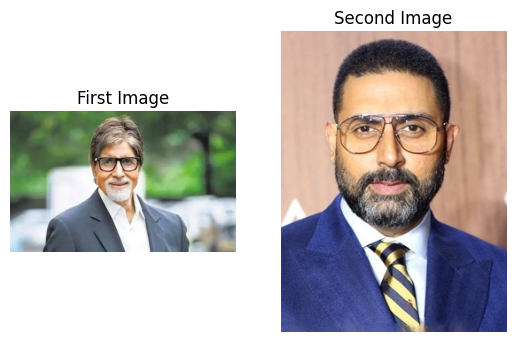

In [2]:
import torch
from facenet_pytorch import InceptionResnetV1
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load pre-trained FaceNet model
model = InceptionResnetV1(pretrained='vggface2').eval()

# Function to get face embedding
def get_face_embedding(image_path):
    try:
        img = Image.open(image_path)
        img = img.resize((160, 160))
        img = np.asarray(img)
        img = torch.tensor(img).permute(2, 0, 1).float() / 255.0
        img = img.unsqueeze(0)
        with torch.no_grad():
            embedding = model(img)
        return embedding
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Paths to images
image1_path = '/users/Nidhi/Desktop/Amitabhb2.jpg'
image2_path = '/users/Nidhi/Desktop/Abhishekb.jpg'

# Load images and get embeddings
embedding1 = get_face_embedding(image1_path)
embedding2 = get_face_embedding(image2_path)

if embedding1 is not None and embedding2 is not None:
    # Compare embeddings using cosine similarity
    cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2)
    print("Cosine similarity:", cosine_similarity.item())
    if cosine_similarity.item() > 0.8:  # Adjust threshold as needed
        print("The faces are of the same person.")
    else:
        print("The faces are of different people.")
else:
    print("Failed to get embeddings for comparison.")

# Load images using OpenCV
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Check if images are loaded correctly
if image1 is None:
    print(f"Failed to load image at {image1_path}")
if image2 is None:
    print(f"Failed to load image at {image2_path}")

if image1 is not None and image2 is not None:
    # Convert BGR to RGB for displaying with matplotlib
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

    # Display images
    plt.subplot(1, 2, 1)
    plt.imshow(image1_rgb)
    plt.title('First Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image2_rgb)
    plt.title('Second Image')
    plt.axis('off')

    plt.show()
else:
    print("One or both images could not be loaded, so they cannot be displayed.")

Cosine similarity: 0.30762290954589844
The faces are of the same person.


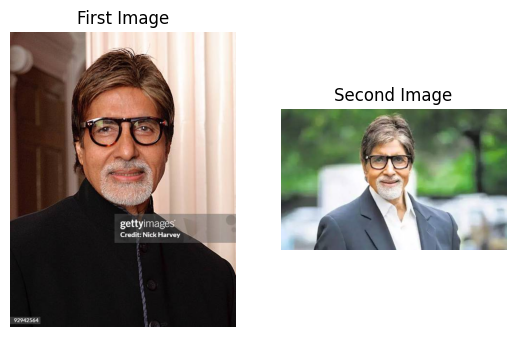

In [11]:
import torch
from facenet_pytorch import InceptionResnetV1
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load pre-trained FaceNet model
model = InceptionResnetV1(pretrained='vggface2').eval()

# Function to get face embedding
def get_face_embedding(image_path):
    try:
        img = Image.open(image_path)
        img = img.resize((160, 160))
        img = np.asarray(img)
        img = torch.tensor(img).permute(2, 0, 1).float() / 255.0
        img = img.unsqueeze(0)
        with torch.no_grad():
            embedding = model(img)
        return embedding
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Paths to images
image1_path = '/users/Nidhi/Desktop/Amitabhb.jpg'
image2_path = '/users/Nidhi/Desktop/Amitabhb2.jpg'

# Load images and get embeddings
embedding1 = get_face_embedding(image1_path)
embedding2 = get_face_embedding(image2_path)

if embedding1 is not None and embedding2 is not None:
    # Compare embeddings using cosine similarity
    cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2)
    print("Cosine similarity:", cosine_similarity.item())
    if cosine_similarity.item() > 0.3:  # Adjust threshold as needed
        print("The faces are of the same person.")
    else:
        print("The faces are of different people.")
else:
    print("Failed to get embeddings for comparison.")

# Load images using OpenCV
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Check if images are loaded correctly
if image1 is None:
    print(f"Failed to load image at {image1_path}")
if image2 is None:
    print(f"Failed to load image at {image2_path}")

if image1 is not None and image2 is not None:
    # Convert BGR to RGB for displaying with matplotlib
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

    # Display images
    plt.subplot(1, 2, 1)
    plt.imshow(image1_rgb)
    plt.title('First Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image2_rgb)
    plt.title('Second Image')
    plt.axis('off')

    plt.show()
else:
    print("One or both images could not be loaded, so they cannot be displayed.")